In [1]:
import pandas as pd 
import numpy as np 

In [2]:
data = pd.read_csv('Maternal_Risk.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
data.shape

(808, 7)

In [5]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,30.585396,112.972772,77.500000,9.264839,98.640347,74.547030
std,13.922075,19.924312,14.772207,3.617635,1.386501,7.808759
min,10.000000,70.000000,49.000000,6.000000,98.000000,60.000000
25%,19.000000,90.000000,65.000000,7.000000,98.000000,70.000000
50%,27.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,40.000000,120.000000,90.000000,11.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [9]:
data.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [4]:
data.corr()

C:\Users\francis mawutor\AppData\Local\Temp\ipykernel_1488\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.459576,0.440481,0.470890,-0.293673,0.072040
SystolicBP,0.459576,1.000000,0.866559,0.487461,-0.303682,0.043845
DiastolicBP,0.440481,0.866559,1.000000,0.438310,-0.287651,0.022935
BS,0.470890,0.487461,0.438310,1.000000,-0.124890,0.182716
BodyTemp,-0.293673,-0.303682,-0.287651,-0.124890,1.000000,0.009084
HeartRate,0.072040,0.043845,0.022935,0.182716,0.009084,1.000000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\francis mawutor\AppData\Local\Temp\ipykernel_124\3600714166.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


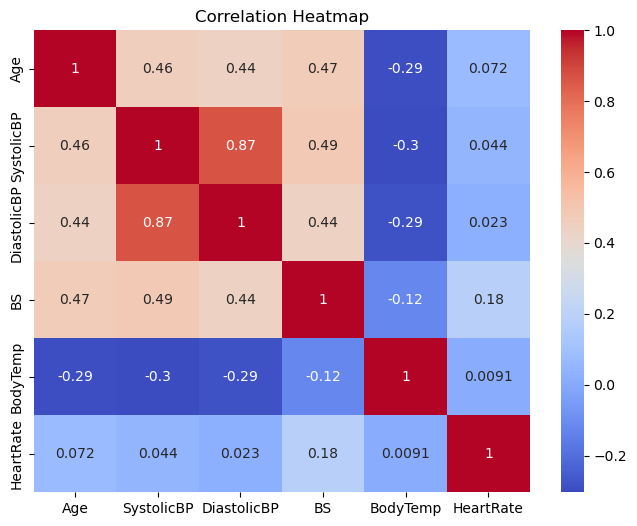

In [11]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

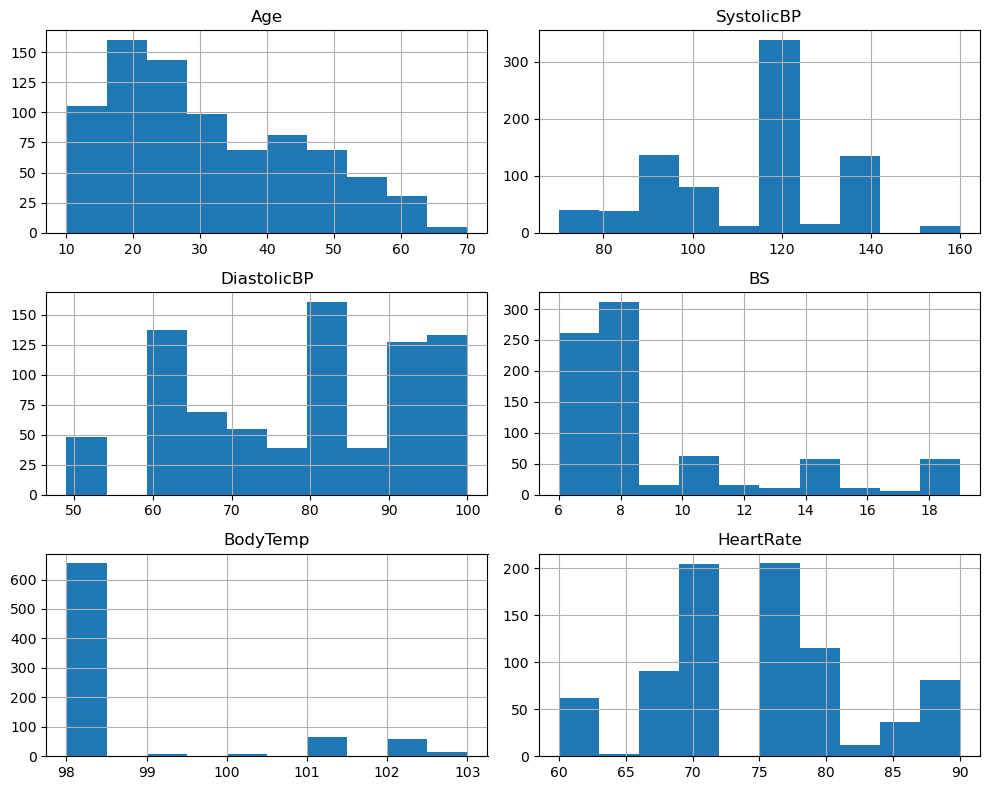

In [12]:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

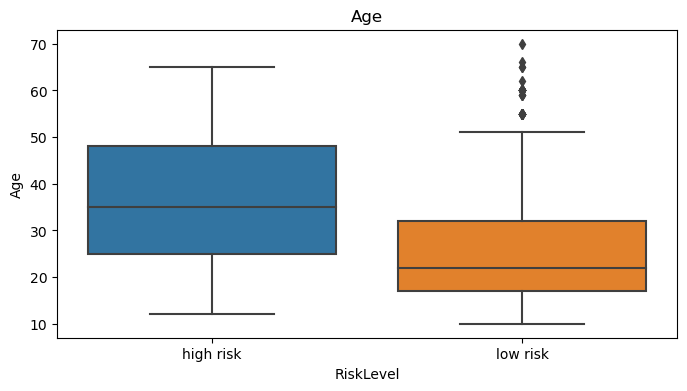

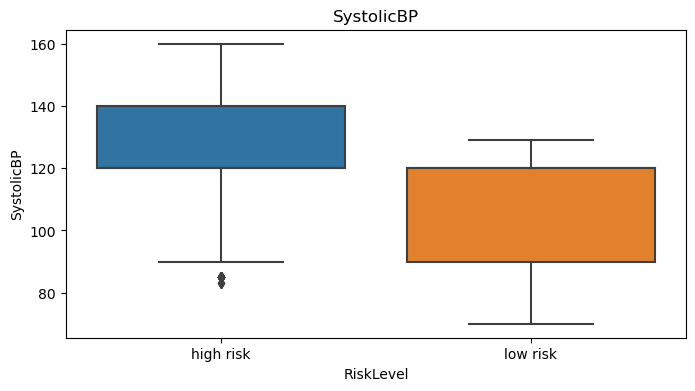

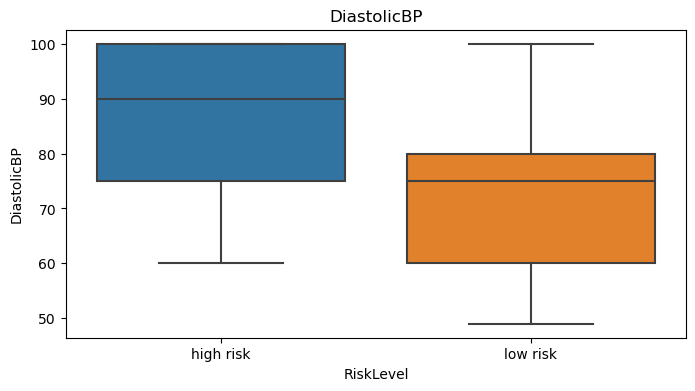

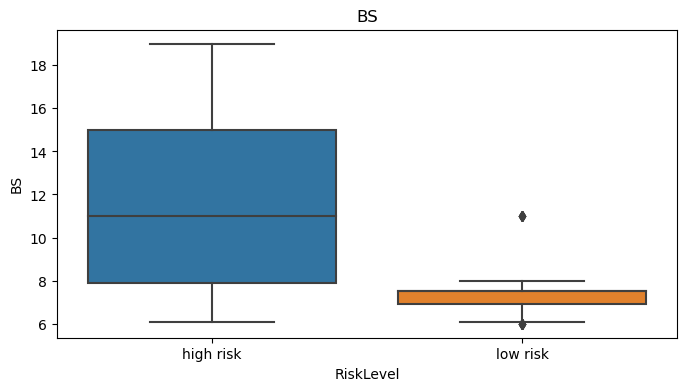

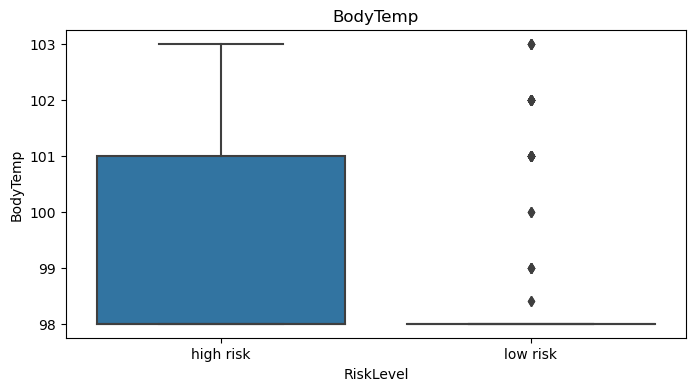

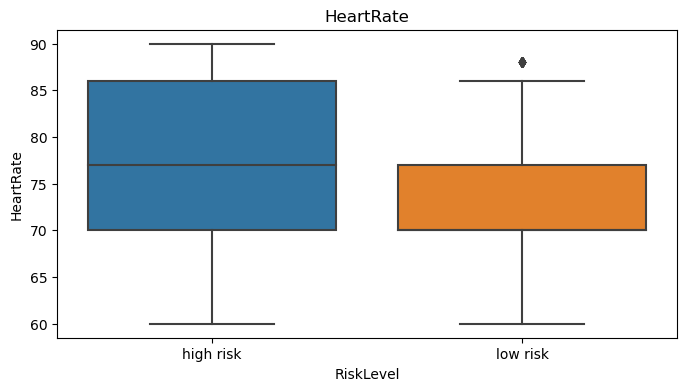

In [9]:
numeric_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    plt.tight_layout()
    sns.boxplot(x='RiskLevel', y=col, data=data)
    plt.title(col)
    plt.show()

In [14]:
from scipy.stats import boxcox
from sklearn.preprocessing import RobustScaler


In [15]:
def winsorize(data, columns, lower_percentile=0.05, upper_percentile=0.95):
    for col in columns:
        lower_bound = data[col].quantile(lower_percentile)
        upper_bound = data[col].quantile(upper_percentile)
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


In [16]:
winsorize(data, ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'])


In [18]:
def transform_boxcox(data, columns):
    for col in columns:
        data[col] = boxcox(data[col])[0]

In [19]:
transform_boxcox(data, ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'])

# Robust scaling
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']])
data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']] = scaled_data


C:\Users\francis mawutor\anaconda3\lib\site-packages\scipy\stats\_morestats.py:935: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
C:\Users\francis mawutor\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:2416: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\francis mawutor\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:2417: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [20]:
print(data.head())

        Age  SystolicBP  DiastolicBP        BS  BodyTemp  HeartRate  RiskLevel
0 -0.104380    0.360627     0.000000  1.020450       0.0   0.979383  high risk
1  0.341851    0.733877     0.406754  0.926935       0.0  -0.604303  high risk
2  0.095676   -1.000000    -0.397916  0.185568       0.0   0.395697  high risk
3  0.140652    0.733877     0.202328 -0.234783       0.0  -0.604303  high risk
4  0.341851    0.000000    -0.785958 -0.844740       0.0   0.000000   low risk


In [21]:
from sklearn.preprocessing import LabelEncoder


In [26]:
label_encoder = LabelEncoder()

In [27]:
data['RiskLevel'] = label_encoder.fit_transform(data['RiskLevel'])


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [30]:
X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data preprocessing - Scaling numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature engineering - if applicable
# Apply feature transformations, create interaction terms, or derive new features as needed

# Model training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        67
           1       0.89      0.96      0.92        95

    accuracy                           0.91       162
   macro avg       0.91      0.90      0.90       162
weighted avg       0.91      0.91      0.91       162



In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [32]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("-----------------------------------")

Training and evaluating Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        67
           1       0.89      0.96      0.92        95

    accuracy                           0.91       162
   macro avg       0.91      0.90      0.90       162
weighted avg       0.91      0.91      0.91       162

-----------------------------------
Training and evaluating Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       1.00      0.96      0.98        95

    accuracy                           0.98       162
   macro avg       0.97      0.98      0.97       162
weighted avg       0.98      0.98      0.98       162

-----------------------------------
Training and evaluating Support Vector Machine...
Classification Report for Support Vector Machine

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score


In [35]:
results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results[model_name] = cv_scores.mean()

# Select the best model based on cross-validation accuracy
best_model = max(results, key=results.get)
print(f"The best model is: {best_model}")

The best model is: Random Forest


In [36]:
for model_name, model in models.items():
    print(f"Training and making predictions using {model_name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Predictions using {model_name}:")
    print(y_pred)
    print("-----------------------------------")

Training and making predictions using Logistic Regression...
Predictions using Logistic Regression:
[0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
-----------------------------------
Training and making predictions using Random Forest...
Predictions using Random Forest:
[0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1
 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 1]
-----------------------------------
Training and making predictions using Support Vector Machine...
Predictions usin